<a href="https://colab.research.google.com/github/Haneen-Alahmadi/SDAIA-Large-Language-Model/blob/main/Blanks_MNIST_handwritten_digit_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Handwritten Digit Classification


For this Hands-on, we will use the popular scikit-learn library to build a basic classifier. The MNIST dataset contains images of handwritten digits, and the task is to classify each image into its corresponding digit (0 to 9).

## Import Libraries

In [1]:
# Import required libraries
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split

## Load the Dataset

**Question 1:** Load the train and test subsets of the mnist dataset from Keras

In [2]:
import tensorflow as tf

# Load the MNIST dataset
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()
print(len(X_train), len(y_train))

11490434/11490434 [==============================] - 1s 0us/step
60000 60000


## Data Pre-Processing

**Question 2:**  

*   Adjust the input shape to match the one the model is expecting
*   Normalize the values of the pixels
*   Turn labels into categories using the to_categorical function

In [3]:
# Preprocess the data

X_train = X_train.reshape(-1, 28, 28, 1)/255 # (/255 )Normalize pixel values to be between 0 and 1
X_test = X_test.reshape(-1, 28, 28, 1)/255

X_train, X_test = np.array(X_train),np.array(X_test)

# Convert labels to categories
y_train = to_categorical(y_train, num_classes = 10)
y_test = to_categorical(y_test, num_classes = 10)

## Build and train a CNN

**Question 3:** Create a Convolutional neural Network of your choice and be carefyl while you select the following:


*   input shape
*   activation function at the output layer
*   number of output neurons



In [5]:
import matplotlib.pyplot as plt

from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense



# Build the CNN model
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), input_shape=(28, 28, 1), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(100, activation='relu'))
model.add(Dense(10, activation='softmax'))

**Question 4:** Compile and train the model. Choose an appropriate loss function, optimizer, and print out the accuracy of the model.

In [7]:
# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=128, validation_split = 0.2)



Epoch 1/10
375/375 [==============================] - 25s 64ms/step - loss: 0.2720 - accuracy: 0.9223 - val_loss: 0.1006 - val_accuracy: 0.9718
Epoch 2/10
375/375 [==============================] - 23s 60ms/step - loss: 0.0814 - accuracy: 0.9766 - val_loss: 0.0728 - val_accuracy: 0.9791
Epoch 3/10
375/375 [==============================] - 26s 70ms/step - loss: 0.0549 - accuracy: 0.9841 - val_loss: 0.0673 - val_accuracy: 0.9812
Epoch 4/10
375/375 [==============================] - 23s 63ms/step - loss: 0.0424 - accuracy: 0.9872 - val_loss: 0.0584 - val_accuracy: 0.9823
Epoch 5/10
375/375 [==============================] - 22s 58ms/step - loss: 0.0332 - accuracy: 0.9900 - val_loss: 0.0531 - val_accuracy: 0.9852
Epoch 6/10
375/375 [==============================] - 24s 65ms/step - loss: 0.0248 - accuracy: 0.9931 - val_loss: 0.0577 - val_accuracy: 0.9837
Epoch 7/10
375/375 [==============================] - 23s 61ms/step - loss: 0.0215 - accuracy: 0.9936 - val_loss: 0.0546 - val_accuracy:

## Evaluate the Model's performance

**Question 5:** Plot the training and validation accuracy to better understand the performance of the model.

313/313 [==============================] - 2s 6ms/step - loss: 0.0558 - accuracy: 0.9840


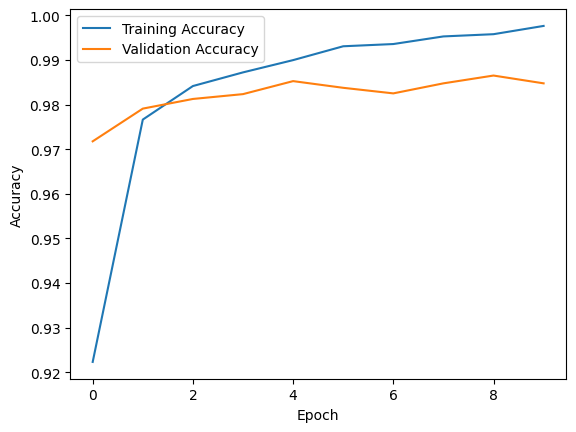

In [8]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test)

plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')

plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
